# <font color=darkblue>CE 4363/5363 Groundwater Hydrology <br> Spring 2023 Exercise Set 3</font>

**LAST NAME, FIRST NAME**

**R00000000**

<hr>

### Purpose : 
Reinforce principles of groundwater flow to wells; apply to various quantitative cases to predict drawdown or infer hydraulic properties
 
### Assessment Criteria : 
Completion, results plausible, format correct, example calculations shown.  
<hr>

# Exercise 3-1 (*Problem 5.1 pp. 215*)
A community is installing a new well in a regionally confined aquifer with a transmissivity of 1589 ft$^2$/day, and a storativity of 0.0005. The planned pumping rate is 325 gal/min.  There are several nearby wells tapping the same aquifer, and the project manager needs to know if the new well will cause significant interference with these existing wells.  Estimate the drawdown caused by the new well after 30 days of continuous pumping at the distances in the table below:

|Time(days)|Distance (ft)|Drawdown (ft)|
|---:|---:|---:|
|30|50||
|30|150||
|30|250||
|30|500||
|30|1000||
|30|3000||
|30|6000||
|30|10,000||


<hr>

Time(days)|Radius(ft)|Drawdown(ft)|
        30|        50|       35.59|
        30|       150|       28.70|
        30|       250|       25.50|
        30|       500|       21.16|
        30|      1000|       16.82|
        30|      3000|       10.00|
        30|      6000|        5.88|
        30|     10000|        3.16|


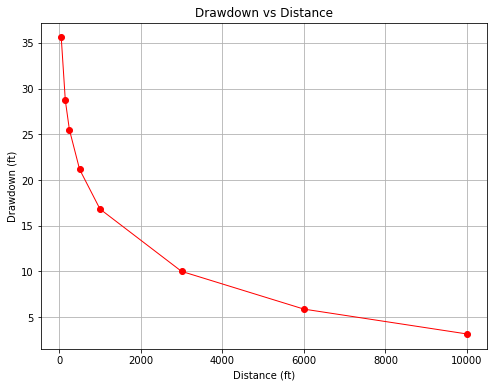

In [2]:
def W(u): # Theis well function using exponential integral
    import scipy.special as sc
    w = sc.expn(1,u)
    return(w)

def s(radius,time,storage,transmissivity,discharge): # Drawdown function using exponential integral
    import math
    u = ((radius**2)*(storage))/(4*transmissivity*time)
    s = ((discharge)/(4*math.pi*transmissivity))*W(u)
    return(s)

data = [[30,50],
[30 ,150],
[30 ,250],
[30 ,500],
[30 ,1000],
[30 ,3000],
[30 ,6000],
[30 ,10000]]
S = 0.0005 # given
T = 1589 #ft^2/day given
QGPM = 325 # given
Q = QGPM*(1/7.48)*(1440/1) # convert to ft^3/day
ddn = [0 for i in range(len(data))]
time = [0 for i in range(len(data))]
distance = [0 for i in range(len(data))]
print("Time(days)|Radius(ft)|Drawdown(ft)|")
for irow in range(len(data)):
    time[irow]=data[irow][0]
    distance[irow]=data[irow][1]
    ddn[irow] = s(distance[irow],time[irow],S,T,Q)
    print("%10i|%10i|%12.2f|"%(time[irow],distance[irow],round(ddn[irow],2)))

# import the package
from matplotlib import pyplot as plt
mydata = plt.figure(figsize = (8,6)) # build a drawing canvass from figure class; aspect ratio 4x3
plt.plot(distance, ddn, c='red', marker='o',linewidth=1) # basic line plot
#plt.xscale('log') # set x-axis to display a logarithmic scale #################
plt.xlabel('Distance (ft)') # label the x-axis
plt.ylabel('Drawdown (ft)') # label the y-axis, notice the LaTex markup
#plt.legend(['series1','series2...']) # legend for each series
plt.title('Drawdown vs Distance') # make a plot title
plt.grid() # display a grid
plt.show() # display the plot

# Exercise 3-2 (*Problem 5.4 pp. 216*)
The pumping well above has a radius of 1 foot.  The observed drawdown in the well is 87 feet.

Determine:
1. The efficiency of the well

<hr>

In [38]:
# %Efficiency = 100*(Computed/Observed)
computed = s(1.0,30,S,T,Q)
observed = 87.0 # Given
efficiency = 100*(computed/observed)
print("Well Efficiency = ",round(efficiency,2)," percent")

Well Efficiency =  69.09  percent


# Exercise 3-3 (*Problem 5.7 pp. 216*)

If the aquifer in the problem(s) above is not fully confined, but is overlain by a 13.7 foot thick leakage layer with vertical hydraulic conductivity of 0.13 ft/day and negligible storativity, what would be the drawdown values after 30 days of pumping at 325 gal/min at the indicated distances

|Time(days)|Distance (ft)|Drawdown (ft)|
|---:|---:|---:|
|30|50||
|30|150||
|30|250||
|30|500||
|30|1000||
|30|3000||
|30|6000||
|30|10,000||

<hr>

Time(days)|Radius(ft)|Drawdown(ft)|
        30|        50|       13.98|
        30|       150|        7.47|
        30|       250|        4.78|
        30|       500|        1.94|
        30|      1000|        0.42|
        30|      3000|        0.00|
        30|      6000|        0.00|
        30|     10000|        0.00|


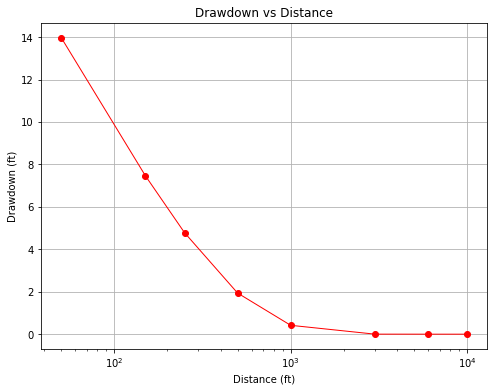

In [46]:
def wh(u, rho): # Hantush Leaky aquifer well function
    import numpy
    try:
        u =float(u)
        rho =float(rho)
    except:
        print("u and rho must be scalars.")
        raise ValueError()

    LOGINF = 2
    y = numpy.logspace(numpy.log10(u), LOGINF, 1000)
    ym = 0.5 * (y[:-1]+  y[1:])
    dy = numpy.diff(y)
    w = numpy.sum(numpy.exp(-ym - (rho / 2)**2 / ym ) * dy / ym)
    return w

def W(u): # Theis well function using exponential integral
    import scipy.special as sc
    w = sc.expn(1,u)
    return(w)

def s(radius,time,storage,transmissivity,discharge): # Drawdown function using exponential integral
    import math
    u = ((radius**2)*(storage))/(4*transmissivity*time)
    s = ((discharge)/(4*math.pi*transmissivity))*W(u)
    return(s)

def sleaky(radius,time,storage,transmissivity,discharge,leakance): # Drawdown function using exponential integral
    import math
    rho = radius/leakance
    u = ((radius**2)*(storage))/(4*transmissivity*time)
    s = ((discharge)/(4*math.pi*transmissivity))*wh(u,rho)
    return(s)

import math
data = [[30,50],
[30 ,150],
[30 ,250],
[30 ,500],
[30 ,1000],
[30 ,3000],
[30 ,6000],
[30 ,10000]]
S = 0.0005 # given
T = 1589 #ft^2/day given
QGPM = 325 # given
Q = QGPM*(1/7.48)*(1440/1) # convert to ft^3/day
bv = 13.7 # ft
kv = 0.13 # ft/day
B = math.sqrt((T*bv)/kv)
ddn = [0 for i in range(len(data))]
time = [0 for i in range(len(data))]
distance = [0 for i in range(len(data))]
print("Time(days)|Radius(ft)|Drawdown(ft)|")
for irow in range(len(data)):
    time[irow]=data[irow][0]
    distance[irow]=data[irow][1]
    ddn[irow] = sleaky(distance[irow],time[irow],S,T,Q,B)
    print("%10i|%10i|%12.2f|"%(time[irow],distance[irow],round(ddn[irow],2)))

# import the package
from matplotlib import pyplot as plt
mydata = plt.figure(figsize = (8,6)) # build a drawing canvass from figure class; aspect ratio 4x3
plt.plot(distance, ddn, c='red', marker='o',linewidth=1) # basic line plot
plt.xscale('log') # set x-axis to display a logarithmic scale #################
plt.xlabel('Distance (ft)') # label the x-axis
plt.ylabel('Drawdown (ft)') # label the y-axis, notice the LaTex markup
#plt.legend(['series1','series2...']) # legend for each series
plt.title('Drawdown vs Distance') # make a plot title
plt.grid() # display a grid
plt.show() # display the plot

# Exercise 3-4 (*Problem 5.9 pp. 216*)

Refering to the well and aquifer system in Exercise 3-1 above, estimate the drawdown at a distance of 250 feet for the times in the table below:

|Time(days)|Distance (ft)|Drawdown (ft)|
|---:|---:|---:|
|1/1440|250||
|2/1440|250||
|5/1440|250||
|10/1440|250||
|15/1440|250||
|30/1440|250||
|60/1440|250||
|2/24|250||
|5/24|250||
|12/24|250||
|1|250||
|5|250||
|10|250||
|20|250||
|30|250||

<hr>

Time(days)|Radius(ft)|Drawdown(ft)|
         0|       250|        0.00|
         0|       250|        0.02|
         0|       250|        0.36|
         0|       250|        1.15|
         0|       250|        1.87|
         0|       250|        3.41|
         0|       250|        5.25|
         0|       250|        7.24|
         0|       250|       10.00|
         0|       250|       12.70|
         1|       250|       14.86|
         5|       250|       19.89|
        10|       250|       22.06|
        20|       250|       24.23|
        30|       250|       25.50|


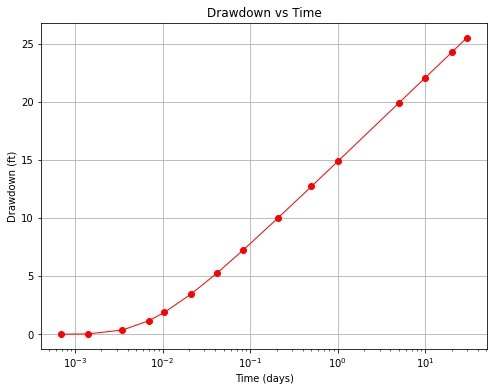

In [50]:
def W(u): # Theis well function using exponential integral
    import scipy.special as sc
    w = sc.expn(1,u)
    return(w)

def s(radius,time,storage,transmissivity,discharge): # Drawdown function using exponential integral
    import math
    u = ((radius**2)*(storage))/(4*transmissivity*time)
    s = ((discharge)/(4*math.pi*transmissivity))*W(u)
    return(s)

data = [[1/1440 ,250], 
[2/1440,250],
[5/1440,250],
[10/1440,250],
[15/1440,250],
[30/1440,250],
[60/1440,250],
[2/24,250],
[5/24,250],
[12/24,250],
[1,250],
[5,250],
[10,250],
[20,250],
[30,250]]

S = 0.0005 # given
T = 1589 #ft^2/day given
QGPM = 325 # given
Q = QGPM*(1/7.48)*(1440/1) # convert to ft^3/day
ddn = [0 for i in range(len(data))]
time = [0 for i in range(len(data))]
distance = [0 for i in range(len(data))]
print("Time(days)|Radius(ft)|Drawdown(ft)|")
for irow in range(len(data)):
    time[irow]=data[irow][0]
    distance[irow]=data[irow][1]
    ddn[irow] = s(distance[irow],time[irow],S,T,Q)
    print("%10i|%10i|%12.2f|"%(time[irow],distance[irow],round(ddn[irow],2)))

# import the package
from matplotlib import pyplot as plt
mydata = plt.figure(figsize = (8,6)) # build a drawing canvass from figure class; aspect ratio 4x3
plt.plot(time, ddn, c='red', marker='o',linewidth=1) # basic line plot
plt.xscale('log') # set x-axis to display a logarithmic scale #################
plt.xlabel('Time (days)') # label the x-axis
plt.ylabel('Drawdown (ft)') # label the y-axis, notice the LaTex markup
#plt.legend(['series1','series2...']) # legend for each series
plt.title('Drawdown vs Time') # make a plot title
plt.grid() # display a grid
plt.show() # display the plot

# Exercise 3-5 (*Problem 5.13 pp. 216*)

A well that pumps at a constsnt rate of 78,000 ft$^3$/day has achieved equilibrium so that there is no change in drawdown with time. (The cone of depression has expanded to include a recharge zone equal to the amount of water being pumped.)  The well taps a confined aquifer that is 18 ft. thick. An observation well 125 ft. away has a head of 277 ft above MSL; another observation well 385 ft. away has a head of 291 ft.

Determine:
1. The aquifer transmissivity using the Theim equation
<hr>

In [7]:
## Theim equation
h1 = 277 #given
h2 = 291 #given
r1 = 125 #given
r2 = 385 #given
Qw = 78000 #given
T = (Qw/(2*math.pi*(h2-h1)))*math.log(r2/r1)
print("Transmissivity = ",round(T,0)," ft^2/day ")

Transmissivity =  997.0  ft^2/day 


# Exercise 3-6 (*Problem 5.14 pp. 216*)

A well that pumps at a constsnt rate of 78,000 ft$^3$/day has achieved equilibrium so that there is no change in drawdown with time. (The cone of depression has expanded to include a recharge zone equal to the amount of water being pumped.)  The well taps an unconfined aquifer that consists of sand overlying impermeable bedrock at an elevation of 260 ft. above MSL. An observation well 125 ft. away has a head of 277 ft. above MSL; another observation well 385 ft. away has a head of 291 ft.

Determine:
1. The hydraulic conductivity using the Theim equation

![](sketch.png)

In [9]:
# Theim equation unconfined
h1   = 277 #given
h2   = 291 #given
href = 260 #given
h1 = h1 - href
h2 = h2 - href
r1 = 125 #given
r2 = 385 #given
Qw = 78000 #given
T = (Qw/(math.pi*(h2**2-h1**2)))*math.log(r2/r1)
print("Transmissivity = ",round(T,0)," ft^2/day ")

Transmissivity =  42.0  ft^2/day 
